In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import csv
plt.style.use('fivethirtyeight')

In [2]:
# importing the data
df = yf.download("INFY.NS", start="2018-07-01", end="2020-06-30")

[*********************100%***********************]  1 of 1 completed


In [3]:
df['Date'] = df.index
df= df.set_index(pd.DatetimeIndex(df['Date'].values))
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Date
2020-06-16,702.000000,712.000000,699.150024,701.200012,673.182678,10131760,2020-06-16
2020-06-17,699.900024,710.299988,698.000000,703.650024,675.534729,7291916,2020-06-17
2020-06-18,708.200012,716.599976,706.000000,713.900024,685.375183,6670195,2020-06-18
2020-06-19,709.000000,711.900024,701.000000,705.549988,677.358765,22438862,2020-06-19
2020-06-22,707.099976,708.700012,700.000000,703.700012,675.582703,7804096,2020-06-22
2020-06-23,695.700012,724.500000,692.099976,720.650024,691.855530,12157390,2020-06-23
2020-06-24,716.900024,726.799988,709.400024,714.150024,685.615173,10220838,2020-06-24
2020-06-25,704.849976,705.599976,693.500000,700.500000,672.510498,14945284,2020-06-25
2020-06-26,710.200012,751.599976,710.000000,748.200012,718.304688,26030458,2020-06-26
2020-06-29,735.400024,744.700012,730.099976,731.750000,702.511963,8954428,2020-06-29


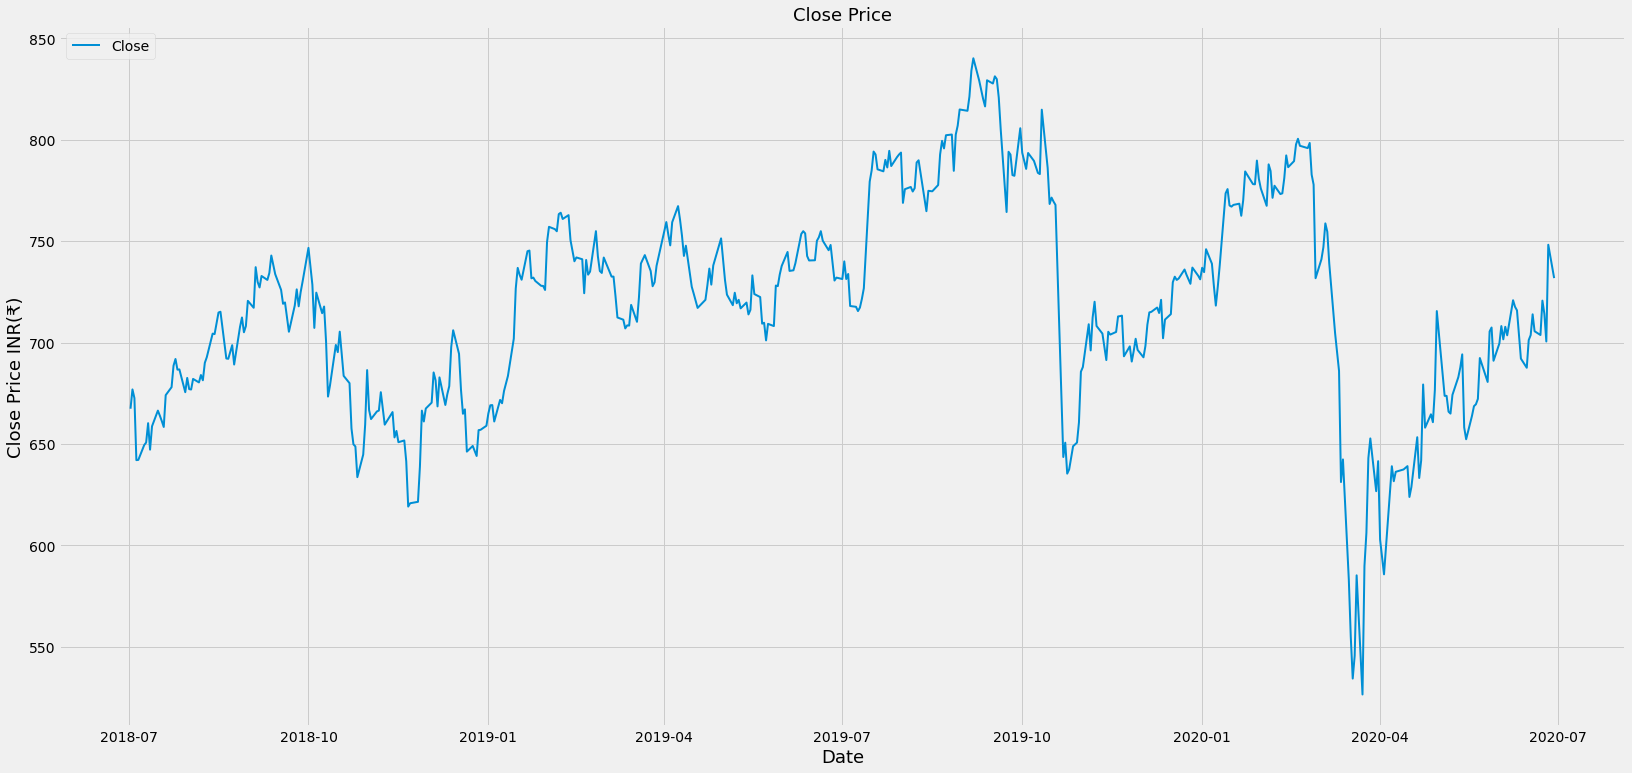

In [4]:
# Visualizing the data
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label= 'Close',linewidth=2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

# Two Moving Averages

In [232]:
# Creating new dataset
data = pd.DataFrame()
data['Date'] = df['Date']
data['Close'] = df['Close']
data['ShortMA'] = df['Close'].rolling(window=21).mean()
data['LongMA'] = df['Close'].rolling(window=55).mean()

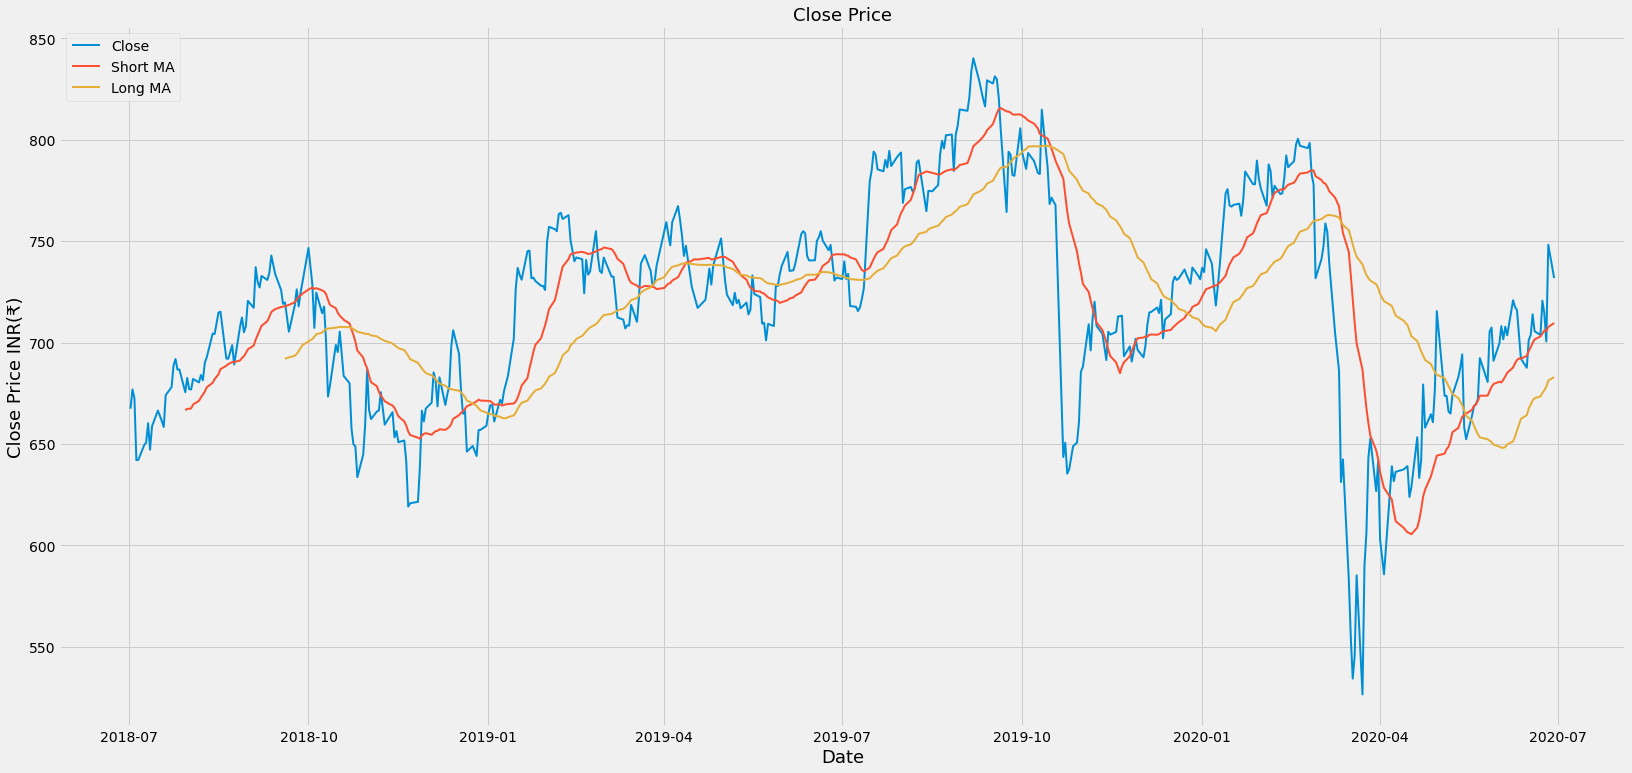

In [233]:
# Plotting all data 
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(data['Close'], label= 'Close', lw=2.0)
plt.plot(data['ShortMA'], label = 'Short MA', lw = 2.0)
plt.plot(data['LongMA'], label = 'Long MA', lw = 2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [234]:
# function to determine buy sell signal price using SMA15 and SMA89
def buy_sell_sma(data):
    sigPriceBuy= []
    sigPriceSell= []
    position = []
    
    for i in range(len(data)):
        if data['ShortMA'][i] < data['LongMA'][i] and data['ShortMA'][i-1] > data['LongMA'][i-1]: #ShortMA crosses LongMA from above, then buy
            sigPriceBuy.append(data['Close'][i])
            sigPriceSell.append(np.nan)
            position.append(0)
                
        elif data['ShortMA'][i] > data['LongMA'][i] and data['ShortMA'][i-1] < data['LongMA'][i-1]: #ShortMA crosses LongMA from below, then sell
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(data['Close'][i])
            position.append(1)
                
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            position.append(-1)

    return(sigPriceBuy,sigPriceSell,position)

In [235]:
buy_sell = buy_sell_sma(data)
data['Buy']= buy_sell[0]
data['Sell']=buy_sell[1]
data['Position']=buy_sell[2]


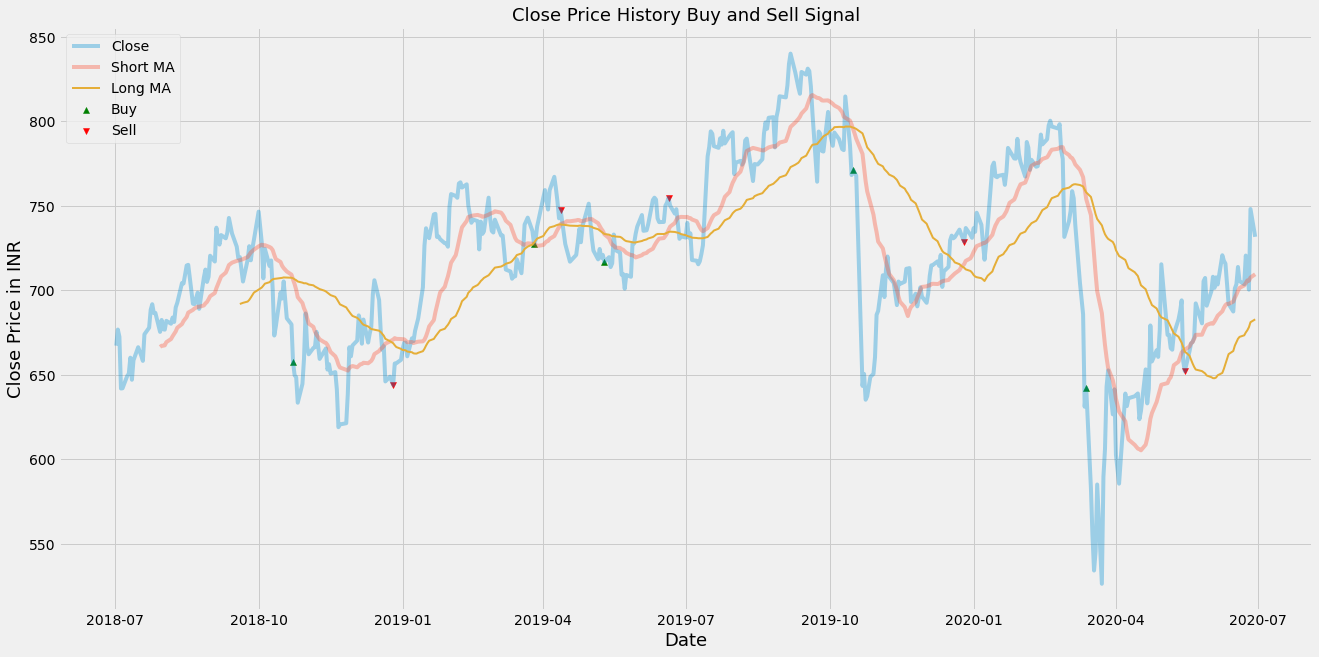

In [236]:
# plotting the buy-sell signals on the graph
plt.figure(figsize=(20,10))
plt.title('Close Price History Buy and Sell Signal', fontsize=18)
plt.plot(data['Close'], label= 'Close', alpha= 0.35)
plt.plot(data['ShortMA'], label= 'Short MA', alpha= 0.35)
plt.plot(data['LongMA'], label = 'Long MA', lw = 2.0)
plt.scatter(data.index, data['Buy'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(data.index, data['Sell'], label= 'Sell', marker= 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands

In [291]:
# Creating new dataset
data2 = pd.DataFrame()
data2['Close'] = df['Close']

# Let the time period be 20
period = 21

# Calculate Simple Moving Average
data2['SMA'] = df['Close'].rolling(window=period).mean()

# Calculate Standard Deviation
data2['Std'] = df['Close'].rolling(window=period).std()

# Calculate the Upper Bollinger Band
data2['Upper'] = data2['SMA'] + 2*data2['Std']

# Calculate the Lower Bollinger Band
data2['Lower'] = data2['SMA'] - 2*data2['Std']

In [292]:
data2

,Close,SMA,Std,Upper,Lower
2018-07-02,667.349976,NaN,NaN,NaN,NaN
2018-07-03,676.875000,NaN,NaN,NaN,NaN
2018-07-04,672.599976,NaN,NaN,NaN,NaN
2018-07-05,642.000000,NaN,NaN,NaN,NaN
2018-07-06,642.125000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-23,720.650024,704.352379,10.476731,725.305842,683.398917
2020-06-24,714.150024,705.952381,9.140344,724.233069,687.671693
2020-06-25,700.500000,705.716666,9.217449,724.151563,687.281769
2020-06-26,748.200012,707.659523,13.080443,733.820408,681.498637


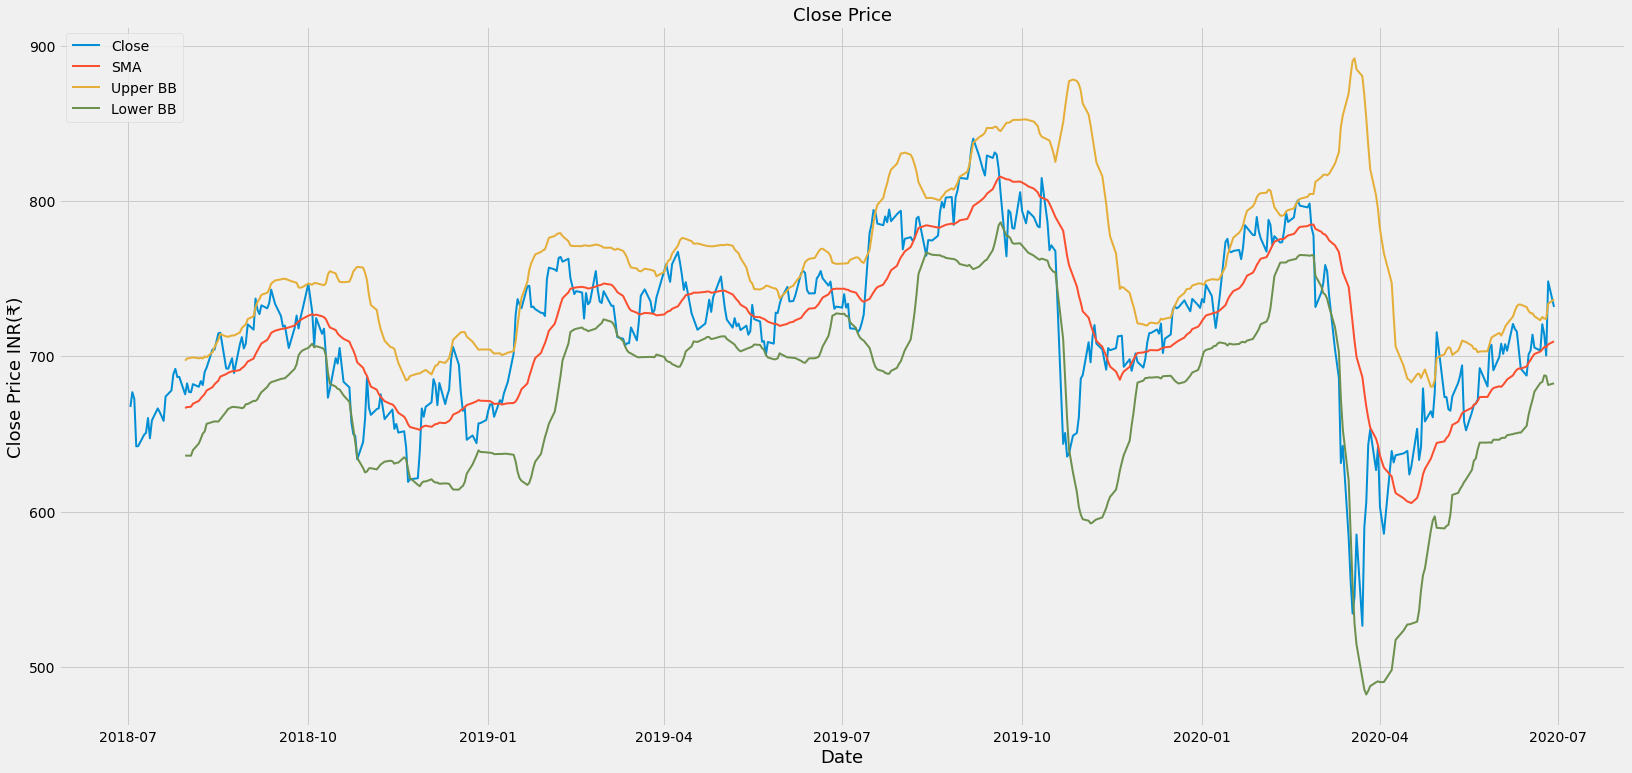

In [293]:
# Plotting all data 
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(data2['Close'], label= 'Close', lw=2.0)
plt.plot(data2['SMA'], label = 'SMA', lw = 2.0)
plt.plot(data2['Upper'], label = 'Upper BB', lw = 2.0)
plt.plot(data2['Lower'], label = 'Lower BB', lw = 2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

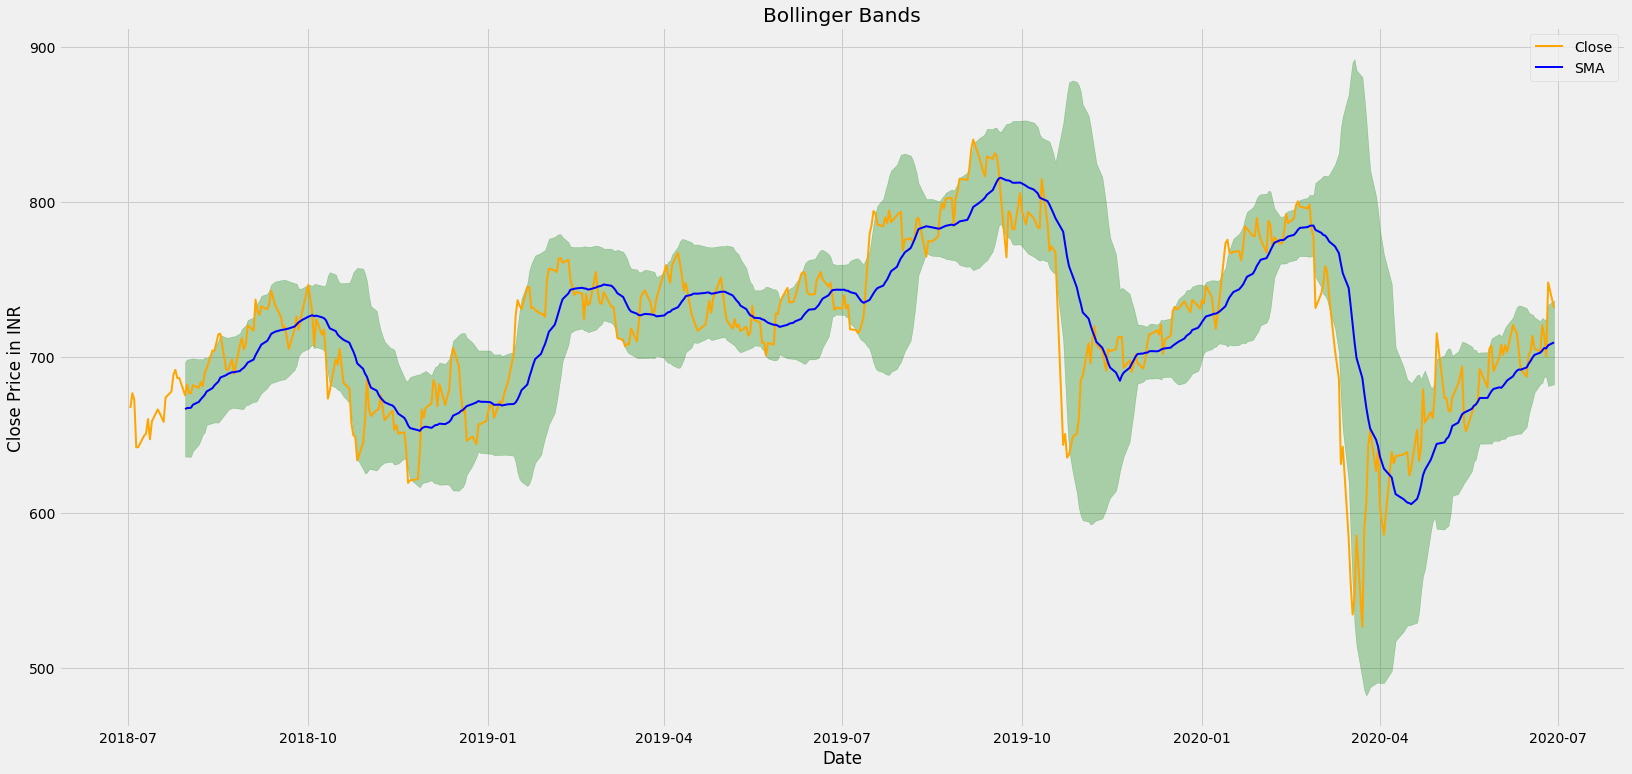

In [294]:
# Shade the Bollinger Bands
fig = plt.figure(figsize=(25,12))
ax = fig.add_subplot(1,1,1)
x_axis = data2.index
ax.fill_between(x_axis, data2['Upper'], data2['Lower'], color = 'green', alpha = 0.3)
ax.plot(x_axis, data2['Close'], color= 'orange', lw=2.0, label= 'Close')
ax.plot(x_axis, data2['SMA'], color= 'Blue', lw=2.0, label= 'SMA')
ax.set_title('Bollinger Bands')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price in INR')
ax.legend()
plt.show()

In [295]:
def buy_sell_bb(data):
    buy_signal = []
    sell_signal = []
    position = []

    for i in range (len(data)):
        if data['Close'][i] > data['Upper'][i]:    # Then sell
            buy_signal.append(np.nan)
            sell_signal.append(data2['Close'][i])
            position.append(1)
        elif data['Close'][i] < data['Lower'][i]:    # Then buy
            buy_signal.append(data2['Close'][i])
            sell_signal.append(np.nan)
            position.append(0)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            position.append(-1)

    return(buy_signal, sell_signal, position)

In [296]:
buy_sell_signal = buy_sell_bb(data2)
data2['Buy_Signal_Price'] = buy_sell_signal[0]
data2['Sell_Signal_Price'] = buy_sell_signal[1]
data2['Position'] = buy_sell_signal[2]

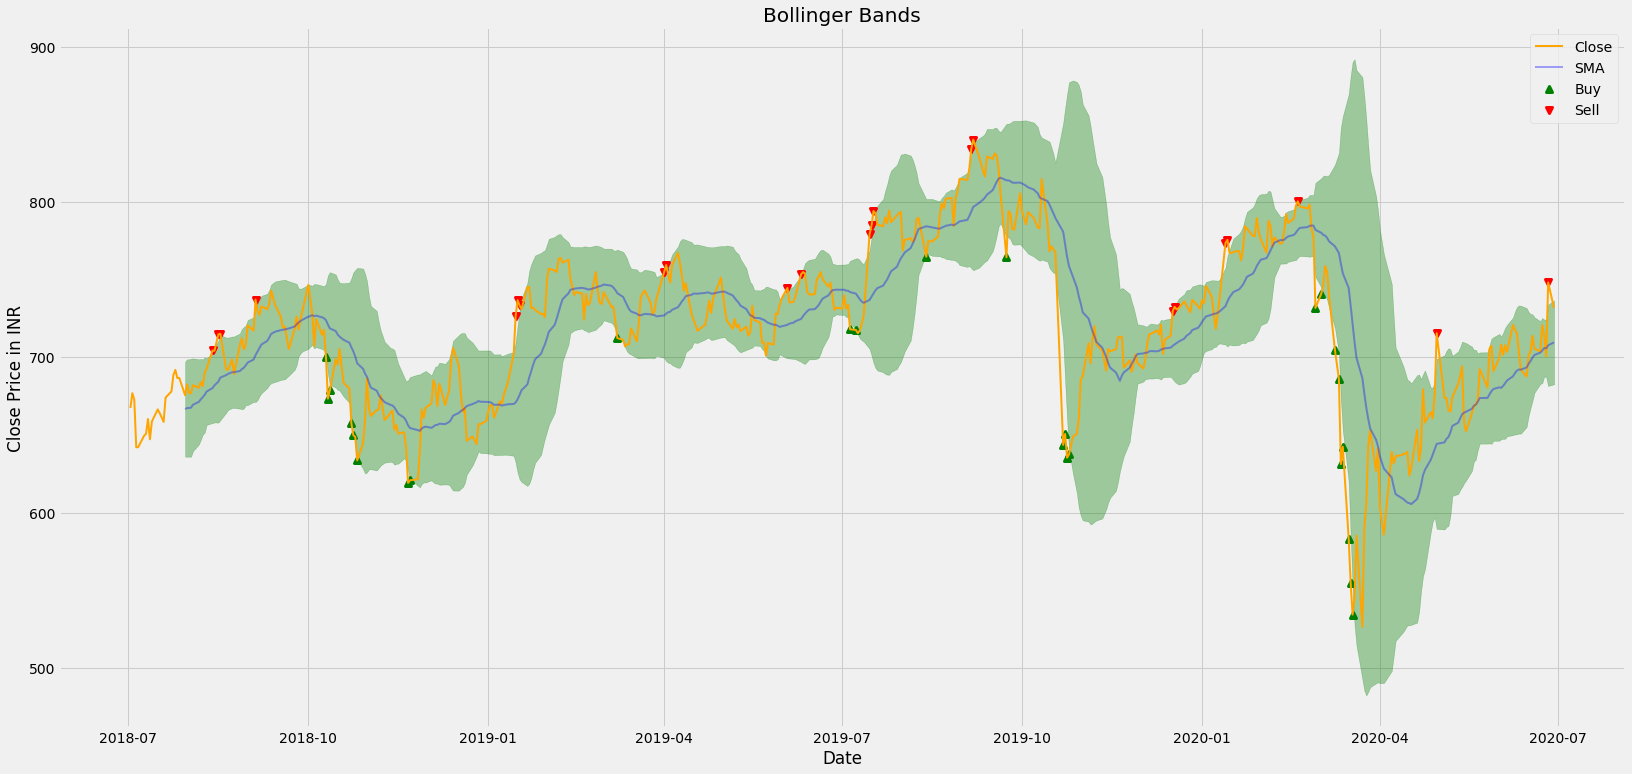

In [297]:
# Plot the buy sell signals
fig = plt.figure(figsize=(25,12))
ax = fig.add_subplot(1,1,1)
x_axis = data2.index
ax.fill_between(x_axis, data2['Upper'], data2['Lower'], color = 'green', alpha=0.35)
ax.plot(x_axis, data2['Close'], color= 'orange', lw=2.0, label= 'Close')
ax.plot(x_axis, data2['SMA'], color= 'Blue', lw=2.0, label= 'SMA', alpha=0.35)
ax.scatter(x_axis, data2['Buy_Signal_Price'], color= 'green', lw= 3.0, label ="Buy", marker = '^')
ax.scatter(x_axis, data2['Sell_Signal_Price'], color= 'red', lw= 3.0, label ="Sell", marker = 'v')
ax.set_title('Bollinger Bands')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price in INR')
ax.legend()
plt.show()

# Combining the strategies : SMA and Bollinger Bands

In [298]:
# Creating the final data frame
dframe = pd.DataFrame()
dframe['Date'] = df['Date']
dframe['Close'] = df['Close']
dframe['ShortMA'] = data['ShortMA']
dframe['LongMA'] = data['LongMA']
dframe['SMA'] = data2['SMA']
dframe['Upper'] = data2['Upper']
dframe['Lower'] = data2['Lower']

dframe

,Date,Close,ShortMA,LongMA,SMA,Upper,Lower
2018-07-02,2018-07-02,667.349976,NaN,NaN,NaN,NaN,NaN
2018-07-03,2018-07-03,676.875000,NaN,NaN,NaN,NaN,NaN
2018-07-04,2018-07-04,672.599976,NaN,NaN,NaN,NaN,NaN
2018-07-05,2018-07-05,642.000000,NaN,NaN,NaN,NaN,NaN
2018-07-06,2018-07-06,642.125000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-23,2020-06-23,720.650024,704.352379,675.172727,704.352379,725.305842,683.398917
2020-06-24,2020-06-24,714.150024,705.952381,676.493637,705.952381,724.233069,687.671693
2020-06-25,2020-06-25,700.500000,705.716666,678.270001,705.716666,724.151563,687.281769
2020-06-26,2020-06-26,748.200012,707.659523,681.224546,707.659523,733.820408,681.498637


In [299]:
# Buy sell signal generator function
def buy_sell_signal(data):

    buy_signal = []
    sell_signal = []
    position = []

    for i in range (len(data)):

        if data['Close'][i] < data['Lower'][i] and data['ShortMA'][i] < data['LongMA'][i]: #then buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            position.append(0)
        elif data['Close'][i] > data['Upper'][i] and data['ShortMA'][i] > data['LongMA'][i]: #then sell
            sell_signal.append(data['Close'][i])
            buy_signal.append(np.nan)
            position.append(1)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            position.append(-1)

    return(buy_signal,sell_signal,position)


In [300]:
buy_sell = buy_sell_signal(dframe)
dframe['Buy_Signal'] = buy_sell[0]
dframe['Sell_Signal'] = buy_sell[1]
dframe['Position'] = buy_sell[2]

In [301]:
dframe

,Date,Close,ShortMA,LongMA,SMA,Upper,Lower,Buy_Signal,Sell_Signal,Position
2018-07-02,2018-07-02,667.349976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2018-07-03,2018-07-03,676.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2018-07-04,2018-07-04,672.599976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2018-07-05,2018-07-05,642.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2018-07-06,2018-07-06,642.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...
2020-06-23,2020-06-23,720.650024,704.352379,675.172727,704.352379,725.305842,683.398917,NaN,NaN,-1
2020-06-24,2020-06-24,714.150024,705.952381,676.493637,705.952381,724.233069,687.671693,NaN,NaN,-1
2020-06-25,2020-06-25,700.500000,705.716666,678.270001,705.716666,724.151563,687.281769,NaN,NaN,-1
2020-06-26,2020-06-26,748.200012,707.659523,681.224546,707.659523,733.820408,681.498637,NaN,748.200012,1


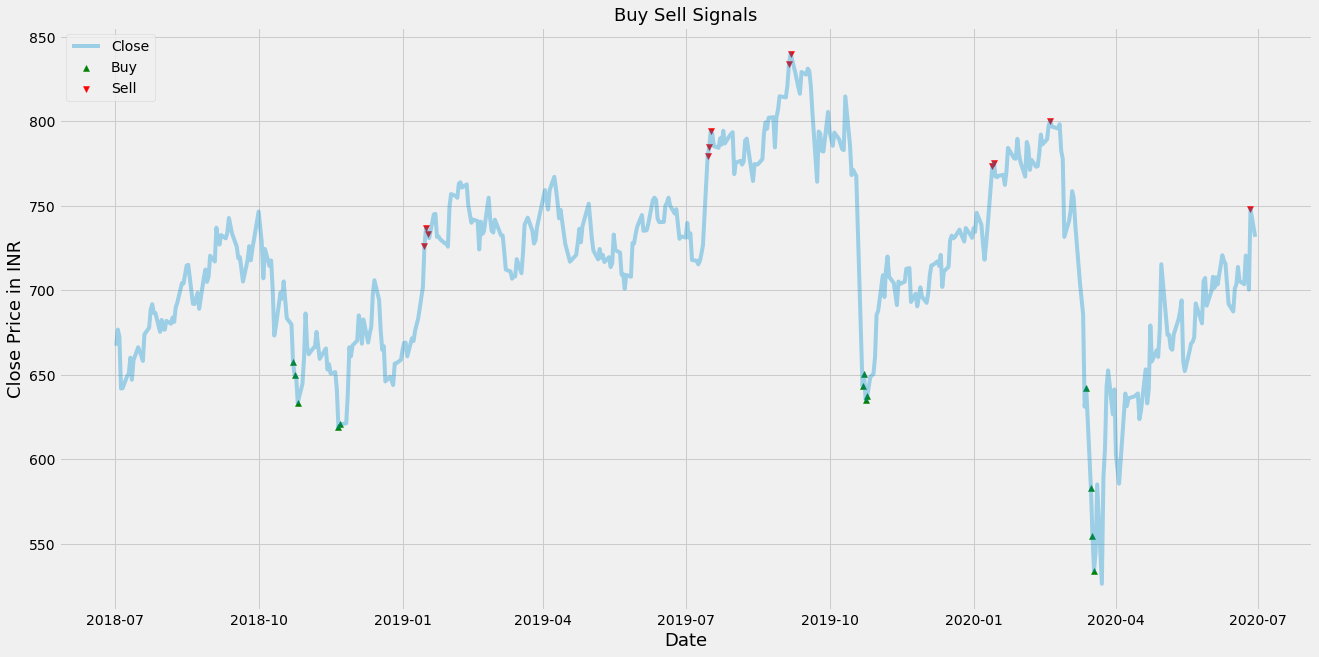

In [302]:
# Plotting the buy sell signals
plt.figure(figsize=(20,10))
plt.title('Buy Sell Signals', fontsize=18)
plt.plot(dframe['Close'], label= 'Close', alpha= 0.35)
plt.scatter(dframe.index, dframe['Buy_Signal'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(dframe.index, dframe['Sell_Signal'], label= 'Sell', marker= 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [303]:
# Writing the buy sell signals in a file

f = open('Training1.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Position', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (len(dframe)):
    if dframe['Position'][i] != -1:
        row= [dframe['Date'][i], dframe['Buy_Signal'][i], dframe['Sell_Signal'][i], dframe['Position'][i]]
        writer.writerow(row)
f.close()

## Position Management

In [304]:
# Given that initial capital = 100000
init_capital = 100000
capital = init_capital


In [305]:
# importing the buy sell signals
sigData= pd.read_csv(r'Training1.csv')
sigData= sigData.set_index(pd.DatetimeIndex(sigData['Date'].values))
sigData

,Date,Buy,Sell,Position,Stocks Bought,Sell Price,Return%
2018-10-23,2018-10-23 00:00:00,657.599976,NaN,0,NaN,NaN,NaN
2018-10-24,2018-10-24 00:00:00,649.799988,NaN,0,NaN,NaN,NaN
2018-10-26,2018-10-26 00:00:00,633.599976,NaN,0,NaN,NaN,NaN
2018-11-21,2018-11-21 00:00:00,619.099976,NaN,0,NaN,NaN,NaN
2018-11-22,2018-11-22 00:00:00,620.750000,NaN,0,NaN,NaN,NaN
2019-01-15,2019-01-15 00:00:00,NaN,726.599976,1,NaN,NaN,NaN
2019-01-16,2019-01-16 00:00:00,NaN,736.799988,1,NaN,NaN,NaN
2019-01-17,2019-01-17 00:00:00,NaN,733.349976,1,NaN,NaN,NaN
2019-07-15,2019-07-15 00:00:00,NaN,779.349976,1,NaN,NaN,NaN
2019-07-16,2019-07-16 00:00:00,NaN,784.849976,1,NaN,NaN,NaN


In [306]:
stocks = 0
stop_loss = capital * 95/100
position = 0
buy_signal = 0
buy_trans = 0
sell_signal = 0
sell_trans = 0

for i in range (len(sigData)):
    if not np.isnan(sigData['Buy'][i]):
        buy_signal = buy_signal + 1

        if sigData['Position'][i] == position:
            buy_trans = buy_trans + 1
            stocks = (int)(capital/sigData['Buy'][i] * 99/100)
            sigData['Stocks Bought'][i] = stocks
            position = 1

    elif not np.isnan(sigData['Sell'][i]):
        sell_signal = sell_signal + 1

        if sigData['Position'][i] == position:
            sell_trans = sell_trans + 1
            capital = stocks * sigData['Sell'][i] * 99/100
            # putting stop loss
            if capital < stop_loss:
                continue
            sigData['Sell Price'][i] = capital
            position = 0
            returnPercent = (capital - init_capital)/init_capital * 100
            sigData['Return%'][i] = returnPercent

if position == 1:
    capital = stocks * df['Close'][-1] * 99/100
    sigData['Sell Price'][i-1] = capital
    returnPercent = (capital - init_capital)/init_capital * 100
    sigData['Return%'][i-1] = returnPercent
    sell_trans = sell_trans + 1


C:\Users\reesh\AppData\Local\Temp\ipykernel_6816\2503704033.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigData['Stocks Bought'][i] = stocks
C:\Users\reesh\AppData\Local\Temp\ipykernel_6816\2503704033.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigData['Sell Price'][i] = capital
C:\Users\reesh\AppData\Local\Temp\ipykernel_6816\2503704033.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigData['Return%'][i] = retu

In [307]:
sigData

,Date,Buy,Sell,Position,Stocks Bought,Sell Price,Return%
2018-10-23,2018-10-23 00:00:00,657.599976,NaN,0,150.0,NaN,NaN
2018-10-24,2018-10-24 00:00:00,649.799988,NaN,0,NaN,NaN,NaN
2018-10-26,2018-10-26 00:00:00,633.599976,NaN,0,NaN,NaN,NaN
2018-11-21,2018-11-21 00:00:00,619.099976,NaN,0,NaN,NaN,NaN
2018-11-22,2018-11-22 00:00:00,620.750000,NaN,0,NaN,NaN,NaN
2019-01-15,2019-01-15 00:00:00,NaN,726.599976,1,NaN,107900.096375,7.900096
2019-01-16,2019-01-16 00:00:00,NaN,736.799988,1,NaN,NaN,NaN
2019-01-17,2019-01-17 00:00:00,NaN,733.349976,1,NaN,NaN,NaN
2019-07-15,2019-07-15 00:00:00,NaN,779.349976,1,NaN,NaN,NaN
2019-07-16,2019-07-16 00:00:00,NaN,784.849976,1,NaN,NaN,NaN


In [308]:
# Write in Output file

f = open('Training1.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (0, len(sigData)):
    if ((not np.isnan(sigData['Buy'][i])) or (not np.isnan(sigData['Sell'][i]))) and ((not np.isnan(sigData['Stocks Bought'][i])) or (not np.isnan(sigData['Sell Price'][i]))):
        row= [sigData['Date'][i], sigData['Buy'][i], sigData['Sell'][i], sigData['Stocks Bought'][i], sigData['Sell Price'][i], sigData['Return%'][i]]
        writer.writerow(row)
f.close()

In [309]:
stockData= pd.read_csv(r'Training1.csv')
stockData= stockData.set_index(pd.DatetimeIndex(stockData['Date'].values))
stockData

,Date,Buy,Sell,Stocks Bought,Sell Price,Return%
2018-10-23,2018-10-23 00:00:00,657.599976,NaN,150.0,NaN,NaN
2019-01-15,2019-01-15 00:00:00,NaN,726.599976,NaN,107900.096375,7.900096
2019-10-22,2019-10-22 00:00:00,643.549988,NaN,165.0,NaN,NaN
2020-01-13,2020-01-13 00:00:00,NaN,773.549988,NaN,126359.390506,26.359391
2020-03-13,2020-03-13 00:00:00,642.349976,NaN,194.0,NaN,NaN
2020-06-26,2020-06-26 00:00:00,NaN,748.200012,NaN,143699.294344,43.699294


In [310]:
# Calculating benchmark return

benchmark = capital * data['Close'][-1]/data['Close'][0]
benchmarkPercent = (benchmark-capital)/capital * 100

# Calculate final return Percent
returnPercent = stockData['Return%'][-1]

print('Benchmark return = ', benchmarkPercent, '%')
print('Actual Return = ', returnPercent , '%')
# Number of Buy and Sell signals generated
print('Number of Buy Signals = ', buy_signal)
print('Number of Sell signals = ', sell_signal)

# Number of Transactions
print('Number of Buy Transactions = ', buy_trans)
print('Number of Sell transactions = ', sell_trans)

Benchmark return =  9.650112650040773 %
Actual Return =  43.69929434448242 %
Number of Buy Signals =  13
Number of Sell signals =  12
Number of Buy Transactions =  3
Number of Sell transactions =  3


# RSI (Relative Strength Index)

In [311]:
# Prepare the data to calculate RSI

# Get the difference in Price from previous day
delta = df['Close'].diff(1)
delta = delta.dropna()
delta

2018-07-03     9.525024
2018-07-04    -4.275024
2018-07-05   -30.599976
2018-07-06     0.125000
2018-07-09     7.299988
                ...    
2020-06-23    16.950012
2020-06-24    -6.500000
2020-06-25   -13.650024
2020-06-26    47.700012
2020-06-29   -16.450012
Name: Close, Length: 485, dtype: float64

In [312]:
# Get the Positive Gain and Negative Gain
up = delta.copy()
down = delta.copy()
up[up<0] = 0
down[down > 0] = 0

In [313]:
# Time period
period = 21

# Calculate average gain and loss
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())

In [314]:
# Calculate the RS
RS = avg_gain/avg_loss

# Calculate the RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

In [315]:
# Creating new Dataframe
dframe1 = pd.DataFrame()
dframe1['Date'] = df['Date']
dframe1['Close'] = df['Close']
dframe1['RSI'] = RSI
dframe1

,Date,Close,RSI
2018-07-02,2018-07-02,667.349976,NaN
2018-07-03,2018-07-03,676.875000,NaN
2018-07-04,2018-07-04,672.599976,NaN
2018-07-05,2018-07-05,642.000000,NaN
2018-07-06,2018-07-06,642.125000,NaN
...,...,...,...
2020-06-23,2020-06-23,720.650024,57.324026
2020-06-24,2020-06-24,714.150024,58.940932
2020-06-25,2020-06-25,700.500000,48.598922
2020-06-26,2020-06-26,748.200012,59.172656


In [316]:
dframe1

,Date,Close,RSI
2018-07-02,2018-07-02,667.349976,NaN
2018-07-03,2018-07-03,676.875000,NaN
2018-07-04,2018-07-04,672.599976,NaN
2018-07-05,2018-07-05,642.000000,NaN
2018-07-06,2018-07-06,642.125000,NaN
...,...,...,...
2020-06-23,2020-06-23,720.650024,57.324026
2020-06-24,2020-06-24,714.150024,58.940932
2020-06-25,2020-06-25,700.500000,48.598922
2020-06-26,2020-06-26,748.200012,59.172656


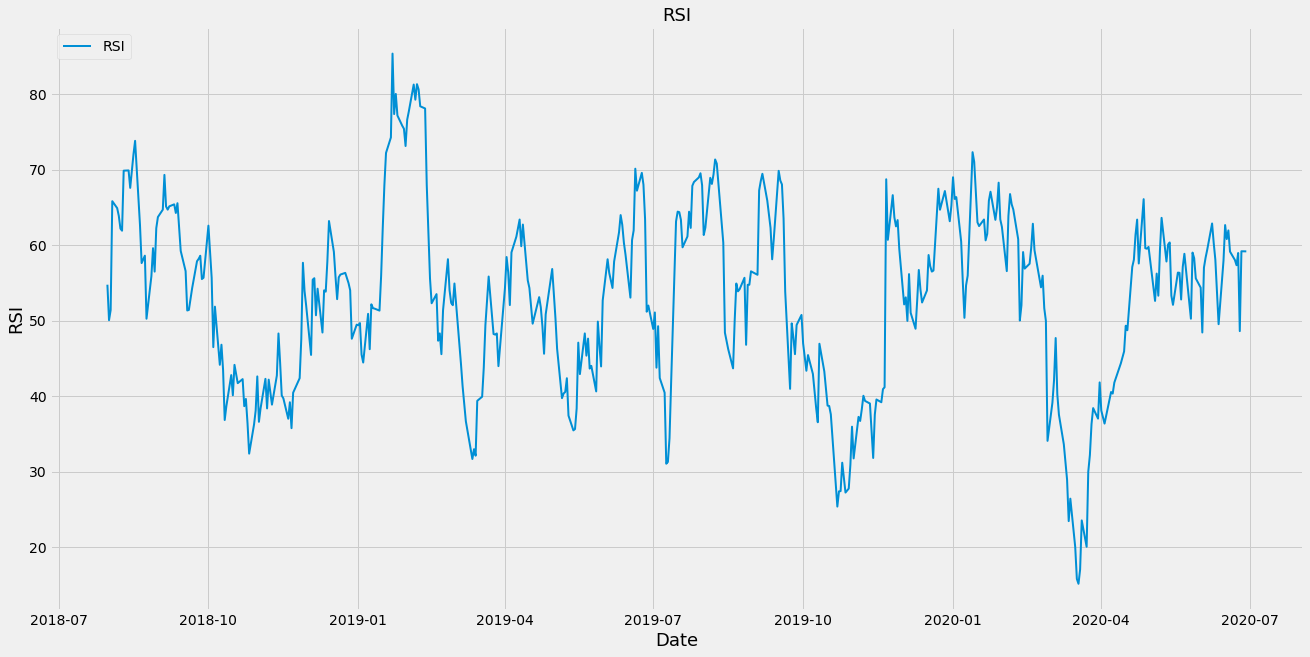

In [317]:
# Plot the data
plt.figure(figsize=(20,10))
plt.title('RSI', fontsize=18)
plt.plot(dframe1['RSI'], label = "RSI", lw = 2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('RSI', fontsize=18)
plt.legend(loc='upper left')
plt.show()

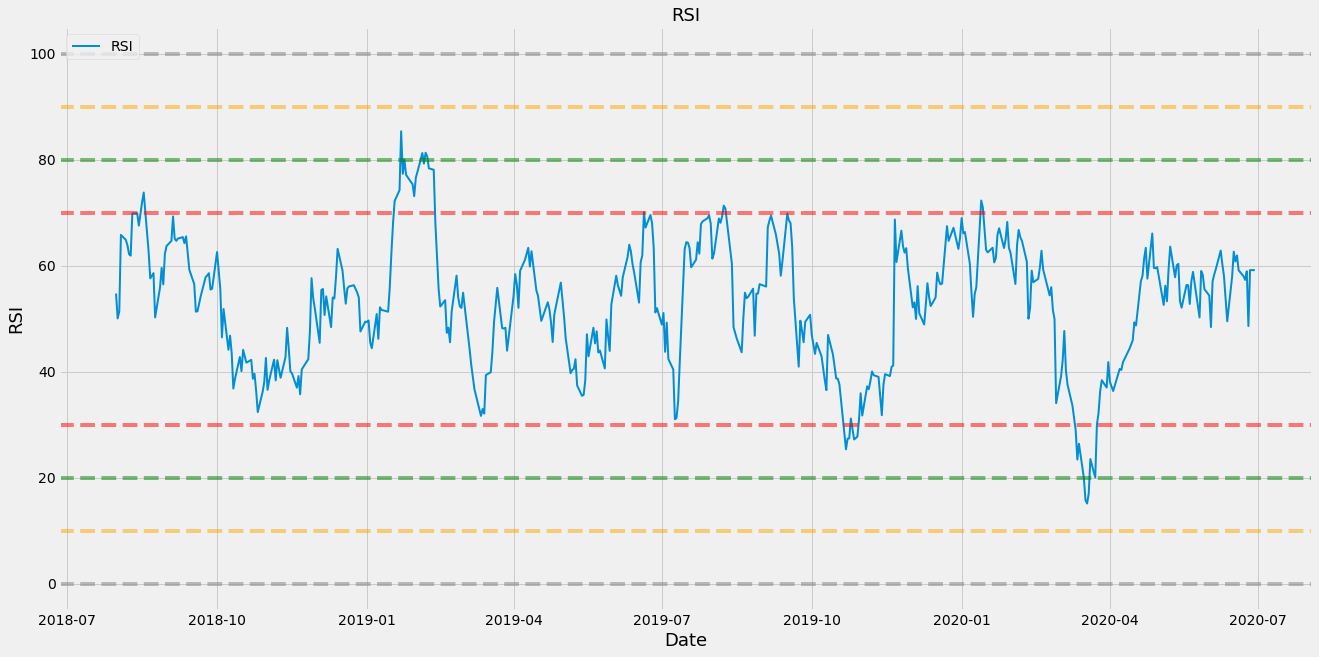

In [318]:
# Plot the RSI values and significant levels
plt.figure(figsize=(20,10))
plt.title('RSI', fontsize=18)
plt.plot(dframe1['RSI'], label = "RSI", lw = 2.0)
plt.axhline(0, linestyle = '--', alpha = 0.5, color = "grey")
plt.axhline(10, linestyle = '--', alpha = 0.5, color = "orange")
plt.axhline(20, linestyle = '--', alpha = 0.5, color = "green")
plt.axhline(30, linestyle = '--', alpha = 0.5, color = "red")
plt.axhline(70, linestyle = '--', alpha = 0.5, color = "red")
plt.axhline(80, linestyle = '--', alpha = 0.5, color = "green")
plt.axhline(90, linestyle = '--', alpha = 0.5, color = "orange")
plt.axhline(100, linestyle = '--', alpha = 0.5, color = "grey")
plt.xlabel('Date', fontsize=18)
plt.ylabel('RSI', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [319]:
def buy_sell_rsi(data):
    buy_signal = []
    sell_signal = []
    position = []
    for i in range (len(data)-1):
        if data['RSI'][i] > 70 and data['RSI'][i+1] <= 70:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
            position.append(1)
        elif data['RSI'][i]<30 and data['RSI'][i+1] >= 30:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            position.append(0)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            position.append(-1)

    buy_signal.append(np.nan)
    sell_signal.append(np.nan)
    position.append(-1)
    return(buy_signal, sell_signal, position)


In [320]:
buy_sell_signal = buy_sell_rsi(dframe1)
dframe1['Buy_Signal'] = buy_sell_signal[0]
dframe1['Sell_Signal'] = buy_sell_signal[1]
dframe1['Position'] = buy_sell_signal[2]

In [321]:
# Writing the buy sell signals in a file

f = open('Training2.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Position', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (len(dframe1)):
    if dframe1['Position'][i] != -1:
        row= [dframe1['Date'][i], dframe1['Buy_Signal'][i], dframe1['Sell_Signal'][i], dframe1['Position'][i]]
        writer.writerow(row)
f.close()

## Position Management

In [322]:
# Given that initial capital = 100000
init_capital = 100000
capital = init_capital

In [323]:
# importing the buy sell signals
sigData= pd.read_csv(r'Training2.csv')
sigData= sigData.set_index(pd.DatetimeIndex(sigData['Date'].values))
sigData

,Date,Buy,Sell,Position,Stocks Bought,Sell Price,Return%
2018-08-17,2018-08-17 00:00:00,NaN,715.174988,1,NaN,NaN,NaN
2019-02-11,2019-02-11 00:00:00,NaN,762.799988,1,NaN,NaN,NaN
2019-06-20,2019-06-20 00:00:00,NaN,754.900024,1,NaN,NaN,NaN
2019-08-09,2019-08-09 00:00:00,NaN,789.849976,1,NaN,NaN,NaN
2019-10-24,2019-10-24 00:00:00,635.349976,NaN,0,NaN,NaN,NaN
2019-10-29,2019-10-29 00:00:00,650.650024,NaN,0,NaN,NaN,NaN
2020-01-14,2020-01-14 00:00:00,NaN,775.650024,1,NaN,NaN,NaN
2020-03-24,2020-03-24 00:00:00,589.799988,NaN,0,NaN,NaN,NaN


In [324]:
stocks = 0
stop_loss = capital * 95/100
position = 0
buy_signal = 0
buy_trans = 0
sell_signal = 0
sell_trans = 0

for i in range (len(sigData)):
    if not np.isnan(sigData['Buy'][i]):
        buy_signal = buy_signal + 1
        if sigData['Position'][i] == position:
            buy_trans = buy_trans + 1
            stocks = np.int(capital/sigData['Buy'][i] * 99/100)
            sigData['Stocks Bought'][i] = stocks
            position = 1

    elif not np.isnan(sigData['Sell'][i]):
        sell_signal = sell_signal +1

        if sigData['Position'][i] == position:
            sell_trans = sell_trans + 1
            capital = stocks * sigData['Sell'][i] * 99/100
            # putting stop loss
            if capital < stop_loss:
                continue
            sigData['Sell Price'][i] = capital
            position = 0
            returnPercent = (capital - init_capital)/init_capital * 100
            sigData['Return%'][i] = returnPercent



# Selling all stocks at the end if last signal was a buy signal
if position == 1:
    capital = stocks * df['Close'][-1] * 99/100
    sigData['Sell Price'][i-1] = capital
    returnPercent = (capital - init_capital)/init_capital * 100
    sigData['Return%'][i] = returnPercent


C:\Users\reesh\AppData\Local\Temp\ipykernel_6816\3769445167.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  stocks = np.int(capital/sigData['Buy'][i] * 99/100)
C:\Users\reesh\AppData\Local\Temp\ipykernel_6816\3769445167.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigData['Stocks Bought'][i] = stocks
C:\Users\reesh\AppData\Local\Temp\ipykernel_6816\3

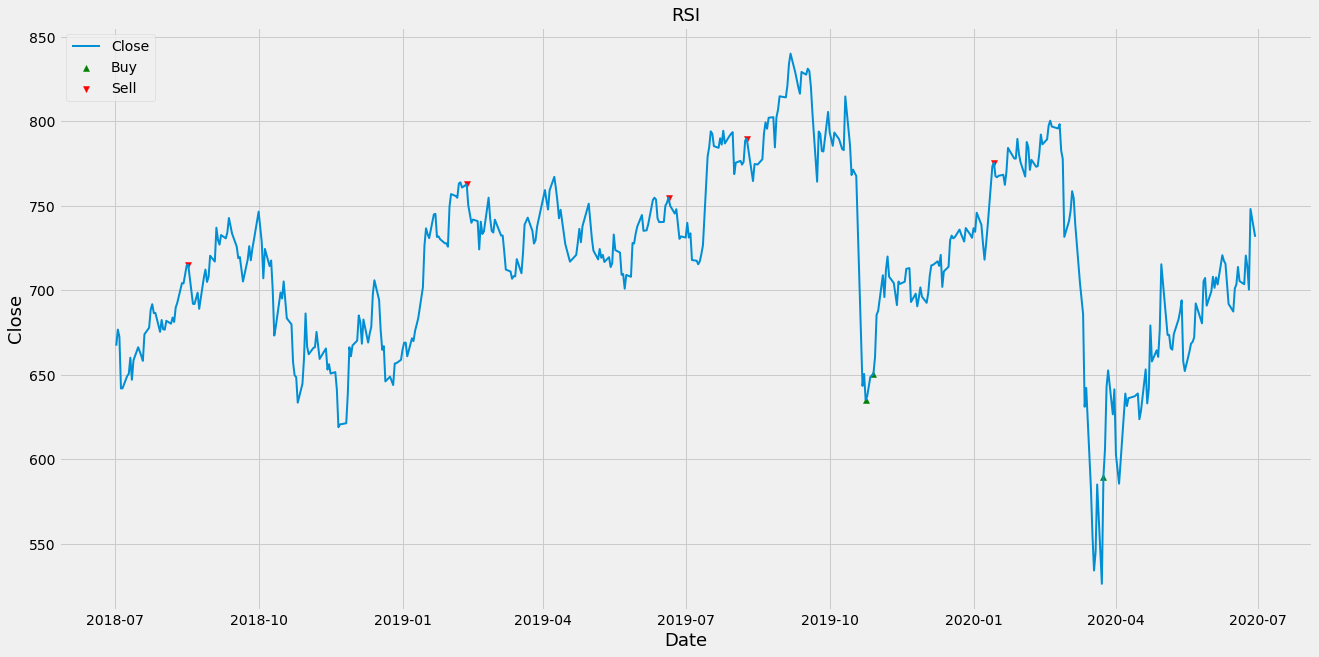

In [325]:
# Plot the buy and sell signals
plt.figure(figsize=(20,10))
plt.title('RSI', fontsize=18)
plt.plot(dframe1['Close'], label = "Close", lw = 2.0)
plt.scatter(dframe1.index, dframe1['Buy_Signal'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(dframe1.index, dframe1['Sell_Signal'], label= 'Sell', marker= 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [326]:
# Write in Output file

f = open('Training2.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (0, len(sigData)):
     if ((not np.isnan(sigData['Buy'][i])) or (not np.isnan(sigData['Sell'][i]))) and ((not np.isnan(sigData['Stocks Bought'][i])) or (not np.isnan(sigData['Sell Price'][i]))):
        row= [sigData['Date'][i], sigData['Buy'][i], sigData['Sell'][i], sigData['Stocks Bought'][i], sigData['Sell Price'][i], sigData['Return%'][i]]
        writer.writerow(row)
f.close()

In [327]:
stockData= pd.read_csv(r'Training2.csv')
stockData= stockData.set_index(pd.DatetimeIndex(stockData['Date'].values))
stockData

,Date,Buy,Sell,Stocks Bought,Sell Price,Return%
2019-10-24,2019-10-24 00:00:00,635.349976,NaN,155.0,NaN,NaN
2020-01-14,2020-01-14 00:00:00,NaN,775.650024,NaN,144162.0675,19.023496
2020-03-24,2020-03-24 00:00:00,589.799988,NaN,199.0,NaN,44.162068


In [328]:
# Calculating benchmark return

benchmark = capital * data['Close'][-1]/data['Close'][0]
benchmarkPercent = (benchmark-capital)/capital * 100

# Calculate final return Percent
returnPercent = stockData['Return%'][-1]

print('Benchmark return = ', benchmarkPercent, '%')
print('Actual Return = ', returnPercent , '%')
# Number of Buy and Sell signals generated
print('Number of Buy Signals = ', buy_signal)
print('Number of Sell signals = ', sell_signal)

# Number of Transactions
print('Number of Buy Transactions = ', buy_trans)
print('Number of Sell transactions = ', sell_trans)

# Maximum Drawdown
min = df['Close'].min()
max = df['Close'].max()

drawdown = (min - max)/max * 100

print('Maximum Drawdown = ', drawdown)

Benchmark return =  9.650112650040754 %
Actual Return =  44.162067500000006 %
Number of Buy Signals =  3
Number of Sell signals =  5
Number of Buy Transactions =  2
Number of Sell transactions =  1
Maximum Drawdown =  -37.33857086129491
